# BANK APP REVIEWS - DASHEN

In [284]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [285]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [286]:
warnings.filterwarnings("ignore")

In [287]:
# variable
BANK="Dashen"

In [288]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [289]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/Dashen_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (449, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6ece1f5e-55f2-404d-b980-1cb45823180f,Masersha,https://play-lh.googleusercontent.com/a/ACg8oc...,መቸሸጠ,5,0,1.0.16,2025-06-03 19:40:31,NaN,NaN
1,765ff69f-5274-45c5-985b-81b8d01e1874,Koki Mulugeta,https://play-lh.googleusercontent.com/a/ACg8oc...,wow,5,0,NaN,2025-06-03 17:30:11,NaN,NaN
2,7db66b6a-a044-43f1-a7ad-ea8a10815548,Badhasa Dassaalany,https://play-lh.googleusercontent.com/a/ACg8oc...,gadaa,5,0,1.0.16,2025-06-01 17:10:53,NaN,NaN
3,caf4a80c-85db-4b49-ab9c-a0b55e152317,Nebiyu Getachew Mamo,https://play-lh.googleusercontent.com/a-/ALV-U...,Massive upgrade from the Amole app.,5,0,1.0.16,2025-05-31 23:04:04,NaN,NaN
4,2c5df026-16eb-4d6b-a044-acf4103d1c36,Mudin said,https://play-lh.googleusercontent.com/a-/ALV-U...,good,4,0,1.0.16,2025-05-31 22:39:35,NaN,NaN


### Dataset Overview

In [290]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
365,faee3a15-6fa8-46e8-9196-55a9a99e7a7e,Habtamu Kebede,https://play-lh.googleusercontent.com/a/ACg8oc...,All good we need more,3,1,1.0.6,2025-01-31 08:58:16,NaN,NaN
175,fdcc34cc-699d-46ba-bcde-69f82e340aa4,Tensae Mulugeta,https://play-lh.googleusercontent.com/a-/ALV-U...,"easy &,simple to use",5,2,1.0.15,2025-04-21 14:06:30,NaN,NaN
95,4041a84a-1399-4b47-86dd-a7f048978f43,firaol fekade,https://play-lh.googleusercontent.com/a-/ALV-U...,execellent,5,1,1.0.14,2025-04-24 09:23:20,NaN,NaN
287,d91ffd3d-5e49-4bee-9cea-553bbc87a371,Chef eshetu abera,https://play-lh.googleusercontent.com/a-/ALV-U...,በጣም ቅልል ያለ አፕ በርቱልን ለአጠቃቀም ምቹ,5,2,1.0.14,2025-03-22 12:23:39,NaN,NaN
229,50117391-aa47-4c25-b9fa-bda3a861d922,Zerihun Belay,https://play-lh.googleusercontent.com/a/ACg8oc...,I love it. one of the best mobile banking app ...,5,3,1.0.15,2025-04-21 11:16:54,NaN,NaN
424,f86b4755-e62d-4f13-86f5-adf5bdf4105a,Tsegaye Kelbesa,https://play-lh.googleusercontent.com/a/ACg8oc...,Always one step a head!,5,4,1.0.1,2025-01-15 10:26:27,NaN,NaN
399,4082204a-22e9-4568-93dc-2e4f572a0a35,Meba Abiye,https://play-lh.googleusercontent.com/a/ACg8oc...,Pro max,5,7,NaN,2025-01-17 08:04:15,NaN,NaN
163,867ceac0-2b05-4261-86c0-093b58ea0553,Eden Kidane,https://play-lh.googleusercontent.com/a-/ALV-U...,It keep my time to pay my bills and I generate...,5,2,NaN,2025-04-21 14:50:46,NaN,NaN
269,0af7f66d-ac1b-46c8-866a-afbed0f5ed57,Yishak Abraham,https://play-lh.googleusercontent.com/a/ACg8oc...,why does it ask me for both pin and opt even t...,2,1,1.0.14,2025-04-02 15:02:36,NaN,NaN
335,62a49d95-3dee-4d62-9b5a-cceff329af48,Hiruy,https://play-lh.googleusercontent.com/a/ACg8oc...,"Dashen Super app is secure, very easy to use a...",5,6,1.0.7,2025-02-14 11:46:51,NaN,NaN


In [291]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
444,650ad650-9821-4bda-a43f-88fec69ab680,Geresu Ku,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,5,NaN,2025-01-13 21:11:58,NaN,NaN
445,cad7278a-410d-4eed-805d-d1a942009cc3,TSEGAW WORKIE,https://play-lh.googleusercontent.com/a/ACg8oc...,"Waw Great and innovated,user friendly, always ...",5,27,1.0.1,2025-01-13 21:01:12,NaN,NaN
446,b92aaec0-99b9-49ac-ae55-03c04a52aec5,Kemal Keyire,https://play-lh.googleusercontent.com/a-/ALV-U...,It's Best waww 🙏,5,15,1.0.1,2025-01-13 09:37:19,NaN,NaN
447,7ed6c112-916c-44c2-b0ae-af2ff9d8c58f,Anwarf ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,Always one step ahead,5,22,1.0.1,2025-01-13 09:15:03,NaN,NaN
448,60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe,Abdulmejid Abdela,https://play-lh.googleusercontent.com/a-/ALV-U...,"Like Me, I Hope It Works Better Than Before.",5,18,1.0.0,2025-01-11 11:36:49,NaN,NaN


In [292]:
#shape of the dataset
df.shape

(449, 10)

In [293]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [294]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,449.0,4.478842,1.199003,1.0,5.0,5.0,5.0,5.0
thumbsUpCount,449.0,7.073497,23.428109,0.0,2.0,2.0,4.0,226.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,449,449,6ece1f5e-55f2-404d-b980-1cb45823180f,1
userName,449,449,Masersha,1
userImage,449,449,https://play-lh.googleusercontent.com/a/ACg8oc...,1
content,449,408,good,11
reviewCreatedVersion,358,11,1.0.14,100
at,449,449,2025-06-03 19:40:31,1


In [296]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              449 non-null    object 
 1   userName              449 non-null    object 
 2   userImage             449 non-null    object 
 3   content               449 non-null    object 
 4   score                 449 non-null    int64  
 5   thumbsUpCount         449 non-null    int64  
 6   reviewCreatedVersion  358 non-null    object 
 7   at                    449 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 35.2+ KB


In [297]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                449
userName                449
userImage               449
at                      449
content                 408
thumbsUpCount            37
reviewCreatedVersion     11
score                     5
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [298]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [299]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,449,100.00%
repliedAt,449,100.00%
reviewCreatedVersion,91,20.27%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [300]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,449,100.00%
repliedAt,449,100.00%
reviewCreatedVersion,91,20.27%


### Duplicates

In [301]:
#count duplicates
dq.count_duplicates()

0

In [302]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [303]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [304]:
#saving the original dataset for later use
df_original=df.copy()

In [305]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
394,55ef171b-bb1b-4c01-9341-6a5a4f13aee1,Bealem Yigrmachew,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,5,2,1.0.4,2025-01-17 22:14:07,NaN,NaN
233,1806822b-7539-4ec1-bb6e-52d6a9786ee0,MAM HAR,https://play-lh.googleusercontent.com/a/ACg8oc...,waw no idea the best app.,5,2,1.0.15,2025-04-19 20:43:26,NaN,NaN
375,567e36a0-fcd9-486a-88aa-11f24f5b1af0,Ruth G,https://play-lh.googleusercontent.com/a-/ALV-U...,The first 3 star review is me,3,19,NaN,2025-01-25 14:59:37,NaN,NaN
447,7ed6c112-916c-44c2-b0ae-af2ff9d8c58f,Anwarf ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,Always one step ahead,5,22,1.0.1,2025-01-13 09:15:03,NaN,NaN
411,e086d148-c7f9-4c2e-ac5f-187b86b5f2f5,tesfaye shibiru,https://play-lh.googleusercontent.com/a/ACg8oc...,Great!,5,3,1.0.4,2025-01-15 21:37:03,NaN,NaN


In [306]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [307]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
70,0472c5b5-9fd3-49be-80f6-cca83ad918e5,Adilyassin dema,https://play-lh.googleusercontent.com/a-/ALV-U...,faster than this version,5,1,1.0.15,2025-05-01 04:20:47,NaN,NaN
295,043ba0ce-d496-4f1c-bcf7-ae23c275d5a6,wase berihun,https://play-lh.googleusercontent.com/a/ACg8oc...,best ever digital banking sector essay for und...,5,3,1.0.14,2025-03-19 13:46:08,NaN,NaN
340,c6d8d045-ccb6-427d-9e8b-3b8937445a28,Addisu Wolde,https://play-lh.googleusercontent.com/a/ACg8oc...,ፍጥነቱ በጣም አሪፍ ነው! እና ቀለል ያለ ነው ! ነገር ግን ተጨማሪ ወደ...,4,1,1.0.4,2025-02-12 22:04:57,NaN,NaN
158,d41af5b1-8acf-4f66-9d54-e14316bf489d,Tekletsadik A Tesfa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dashen Bank Super App is fast, reliable, and s...",5,2,NaN,2025-04-21 15:16:09,NaN,NaN
371,9b86685f-1b04-4481-baa8-f84646df2433,befikadu abebe,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,2,1.0.4,2025-01-29 11:16:30,NaN,NaN


In [308]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [309]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [310]:
dq.find_invalid_values()

{}

In [311]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [312]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wowwwe+app "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=gadaa "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://tr

In [313]:
df.shape

(449, 5)

In [315]:
df=dq.filter_english_text('content')

[INFO] Dropped 4 non-English rows from 'content' column.


### Inconsistencies and Inaccuracies

In [316]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [317]:
df=dq.convert_columns_to_datetime()

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 3 to 448
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       327 non-null    object
 1   content        327 non-null    object
 2   score          327 non-null    int64 
 3   thumbsUpCount  327 non-null    int64 
 4   at             327 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.3+ KB


In [319]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [320]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [321]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [322]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
308,Greately improved since it was released! I rea...,5,2025-03-10 13:06:34,Nebiyou Fasil,56,Dashen,Google Store
123,"A powerful, local solution that rivals any glo...",5,2025-04-22 08:05:12,eden Tesfaye,3,Dashen,Google Store
43,its my choice,5,2025-05-15 21:15:44,TESFA Dagne,0,Dashen,Google Store
5,very good for this app,5,2025-05-31 21:03:18,Tamiru Mamo,0,Dashen,Google Store
183,The app keeps getting better with every update...,5,2025-04-21 13:17:43,Hiwi Alex,5,Dashen,Google Store
143,one of the best digital platforms I’ve used! F...,5,2025-04-21 17:40:32,firaol Gosa,4,Dashen,Google Store
89,It is one of the best app ever use it and do it,5,2025-04-26 11:22:42,Muluken Nega,1,Dashen,Google Store
337,It's Amazing App I Have Seen Ever,5,2025-02-13 22:00:54,Amanuel Teklay,3,Dashen,Google Store
274,wallahi very fantastic Bank,5,2025-03-31 17:29:06,Masud Rabi,2,Dashen,Google Store
182,Dashen Bank Super App is a game-changer! The u...,5,2025-04-21 13:23:07,Endale G/selassie,6,Dashen,Google Store


## 6. Analyze & Visualize

In [323]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


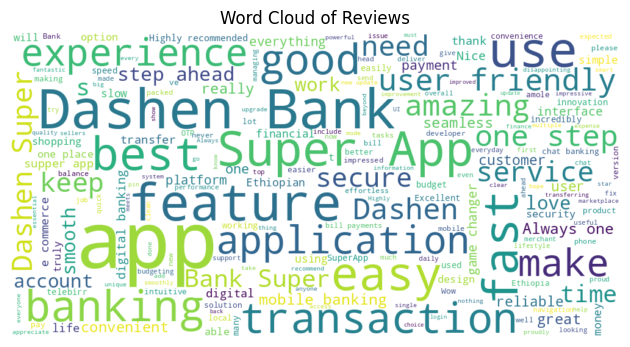

In [324]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


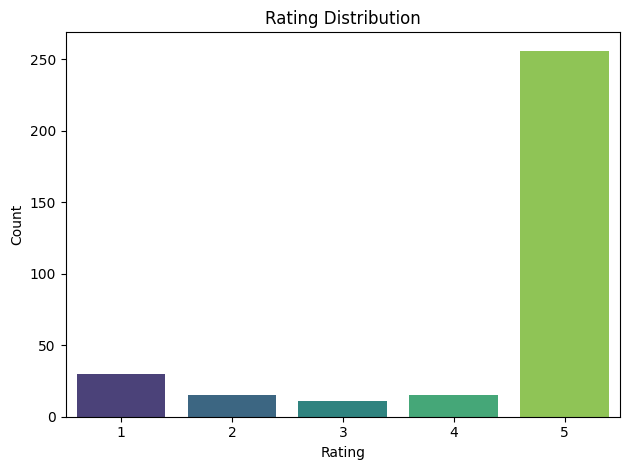

In [325]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


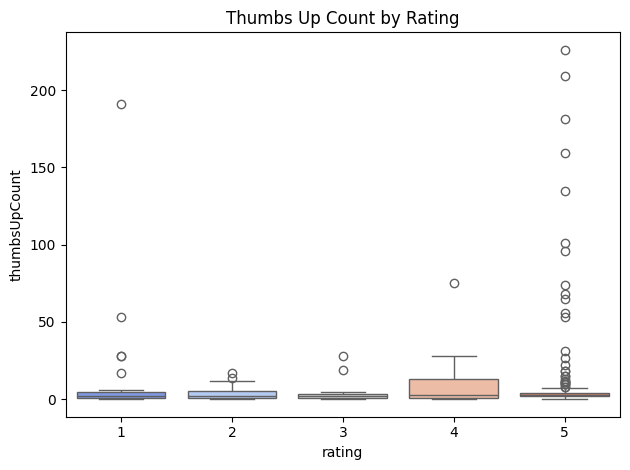

In [326]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


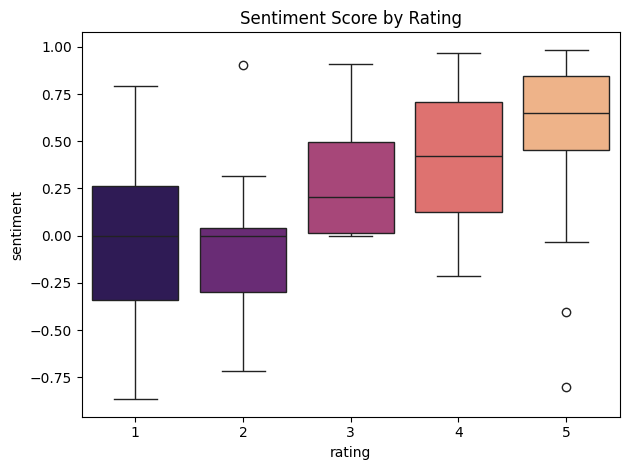

In [327]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [328]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [329]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [330]:
df.sample(15)

,review,rating,date,bank,source
155,The Dashen supperapp is a revolutionary advanc...,5,2025-04-21 15:40:34,Dashen,Google Store
421,U can't create account,1,2025-01-15 11:08:21,Dashen,Google Store
167,"This Is An Amazing App with Uniqe Quality,Easy...",5,2025-04-21 14:39:18,Dashen,Google Store
246,It's bad for the connection and too many days ...,1,2025-04-12 16:59:05,Dashen,Google Store
130,A proudly Ethiopia innovation that delivers be...,5,2025-04-21 22:21:45,Dashen,Google Store
206,it is the most amazing mobile app,5,2025-04-21 11:40:59,Dashen,Google Store
110,i love this app esp 3 click that make e-commer...,5,2025-04-22 13:24:34,Dashen,Google Store
148,Super Easy To Use and Fast Transaction.,5,2025-04-21 16:28:55,Dashen,Google Store
365,All Good We Need More,3,2025-01-31 08:58:16,Dashen,Google Store
196,easiness to use with fast response time,5,2025-04-21 12:01:20,Dashen,Google Store
